In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv('empattrition.csv')

In [26]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [27]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [28]:
x = df.drop(['PerformanceRating'], axis=1)
y = df['PerformanceRating']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=11, stratify=y)

In [29]:
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
PerformanceRating
3    0.846453
4    0.153547
Name: proportion, dtype: float64

Test set class distribution:
PerformanceRating
3    0.845805
4    0.154195
Name: proportion, dtype: float64


In [30]:
# Apply SMOTE o on training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

print("After SMOTE:")
print(y_resampled.value_counts(normalize=True))

After SMOTE:
PerformanceRating
3    0.5
4    0.5
Name: proportion, dtype: float64


In [31]:
model = RandomForestClassifier(n_jobs=-1, n_estimators= 15, max_depth=6, class_weight='balanced', random_state=20)
model.fit(x_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=15,
                       n_jobs=-1, random_state=20)

In [32]:
sorted_importances_new = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True))

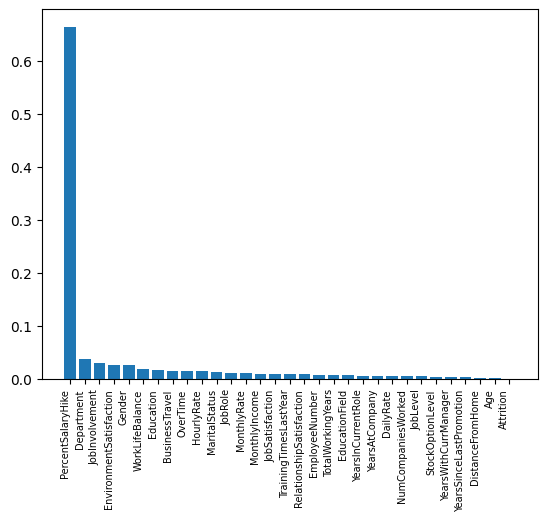

In [33]:
plt.Figure(figsize=(20,8))
plt.bar(sorted_importances_new.keys(), sorted_importances_new.values())
plt.xticks(rotation = 90, ha='right', size=7)
plt.show()

In [34]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       373
           4       1.00      0.99      0.99        68

    accuracy                           1.00       441
   macro avg       1.00      0.99      1.00       441
weighted avg       1.00      1.00      1.00       441

[[373   0]
 [  1  67]]
Model accuracy score : 0.9977


In [35]:
from sklearn.model_selection import cross_val_score

cv_scores_rfc = cross_val_score(model, x_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores_rfc)
print("Mean CV Accuracy:", cv_scores_rfc.mean())

Cross-Validation Accuracy Scores: [0.99426934 1.         1.         1.         1.        ]
Mean CV Accuracy: 0.9988538681948423


In [36]:
import os
import pickle

# Save the trained XGBoost model to file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("RF model model saved successfully")


RF model model saved successfully
